# CHAPTER 1: ECONOMIC GROWTH EVIDENCE

**NOTE:** This has been written by Oscar Alvarenga as his notes of the compilation of economic lectures "A First Course in Quantitative Economics with Python" by Thomas J. Sargent & John Stachurski.<br>
**ORIGINAL AND COMPLETE REFERENCE:** [Economic Growth Evidence](https://intro.quantecon.org/long_run_growth.html#overview)

## Keypoints

- Explaining growth facts is a principal purpose of "Development Economics" and "Economic History"
- Growth facts are also important inputs for historians' studies of geopolitical forces and dynamics. A great and contemporary example can be found in the book of Ray Dalio: `Dalio R. Principles for Dealing with the Changing World Order. New York: Simon & Schuster; 2021. http://public.eblib.com/choice/PublicFullRecord.aspx?p=6803383. Accessed October 30 2023.`
- Growth facts can also help companies understand the trends and economical paths of the countries they are investing or planning to invest. They can also help to adapt to rising market conditions.

## Objectives:

- In this chapter there was a review of growth trajectories of various countries over long periods.
- Analysis of total GDP and GDP Per Capita will be performed to notice the economical evolution of countries with changing populations and different sizes.

## Setting Up

### 1) Importing packages

In [2]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D

### 2) Setting up the data

The __[2020 data](https://intro.quantecon.org/_downloads/e6a877d92ac60529ff17d034840c0c83/mpd2020.xlsx)__ from the project initiated by __[Angus Maddison](https://en.wikipedia.org/wiki/Angus_Maddison)__ has been shared by the QuantEcon team in `Excel` Format. <br>
<br>
We will read it as a pandas dataframe:

In [3]:
os.getcwd()

'C:\\Users\\oscar\\Documents\\Oscar\\Personales\\QuantEcon\\Python\\QuantEcon Blog\\1 Economic Growth Evidence'

In [4]:
data = pd.read_excel("./datasets/mpd2020.xlsx", sheet_name="Full data")
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


#### Variables in *Data*
- gdppc: GDP Per Capita
- pop: Population

Number of countries:

In [5]:
len(data.country.unique())

169

Looping over countries to understand the available years:

In [6]:
country_years = []
for country in data.country.unique():
    cy_data = data[data.country == country]["year"]
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))

country_years = pd.DataFrame(country_years,\
                             columns=["country", "Min Year", "Max Year"])\
                            .set_index("country")
country_years

,Min Year,Max Year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018
...,...,...
Yemen,1820,2018
Former Yugoslavia,1,2018
South Africa,1,2018


#### Reshaping the original data

Convenient variables to enable quicker access to countries time series data. <br>
Mapping between country codes and country names in the dataset:

In [7]:
code_to_name = data[["countrycode", "country"]].drop_duplicates()\
                .reset_index(drop=True).set_index(["countrycode"])
code_to_name

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina
...,...
YEM,Yemen
YUG,Former Yugoslavia
ZAF,South Africa


Now it's possible to focus quicker on GDP per Capita

In [8]:
gdppc = data.set_index(["countrycode", "year"])["gdppc"]
gdppc = gdppc.unstack("countrycode")
gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


It's also possible to create a color mapping between country codes and colors.<br>
This is done for consistency:

In [9]:
country_names = data["countrycode"]

# Generate colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to it's corresponding color
color_mapping = {country: color for country, color in zip(country_names, colors)}

### 3) GDP Plots

Using the United Kingdom to confirm that we are using the correct country codes:

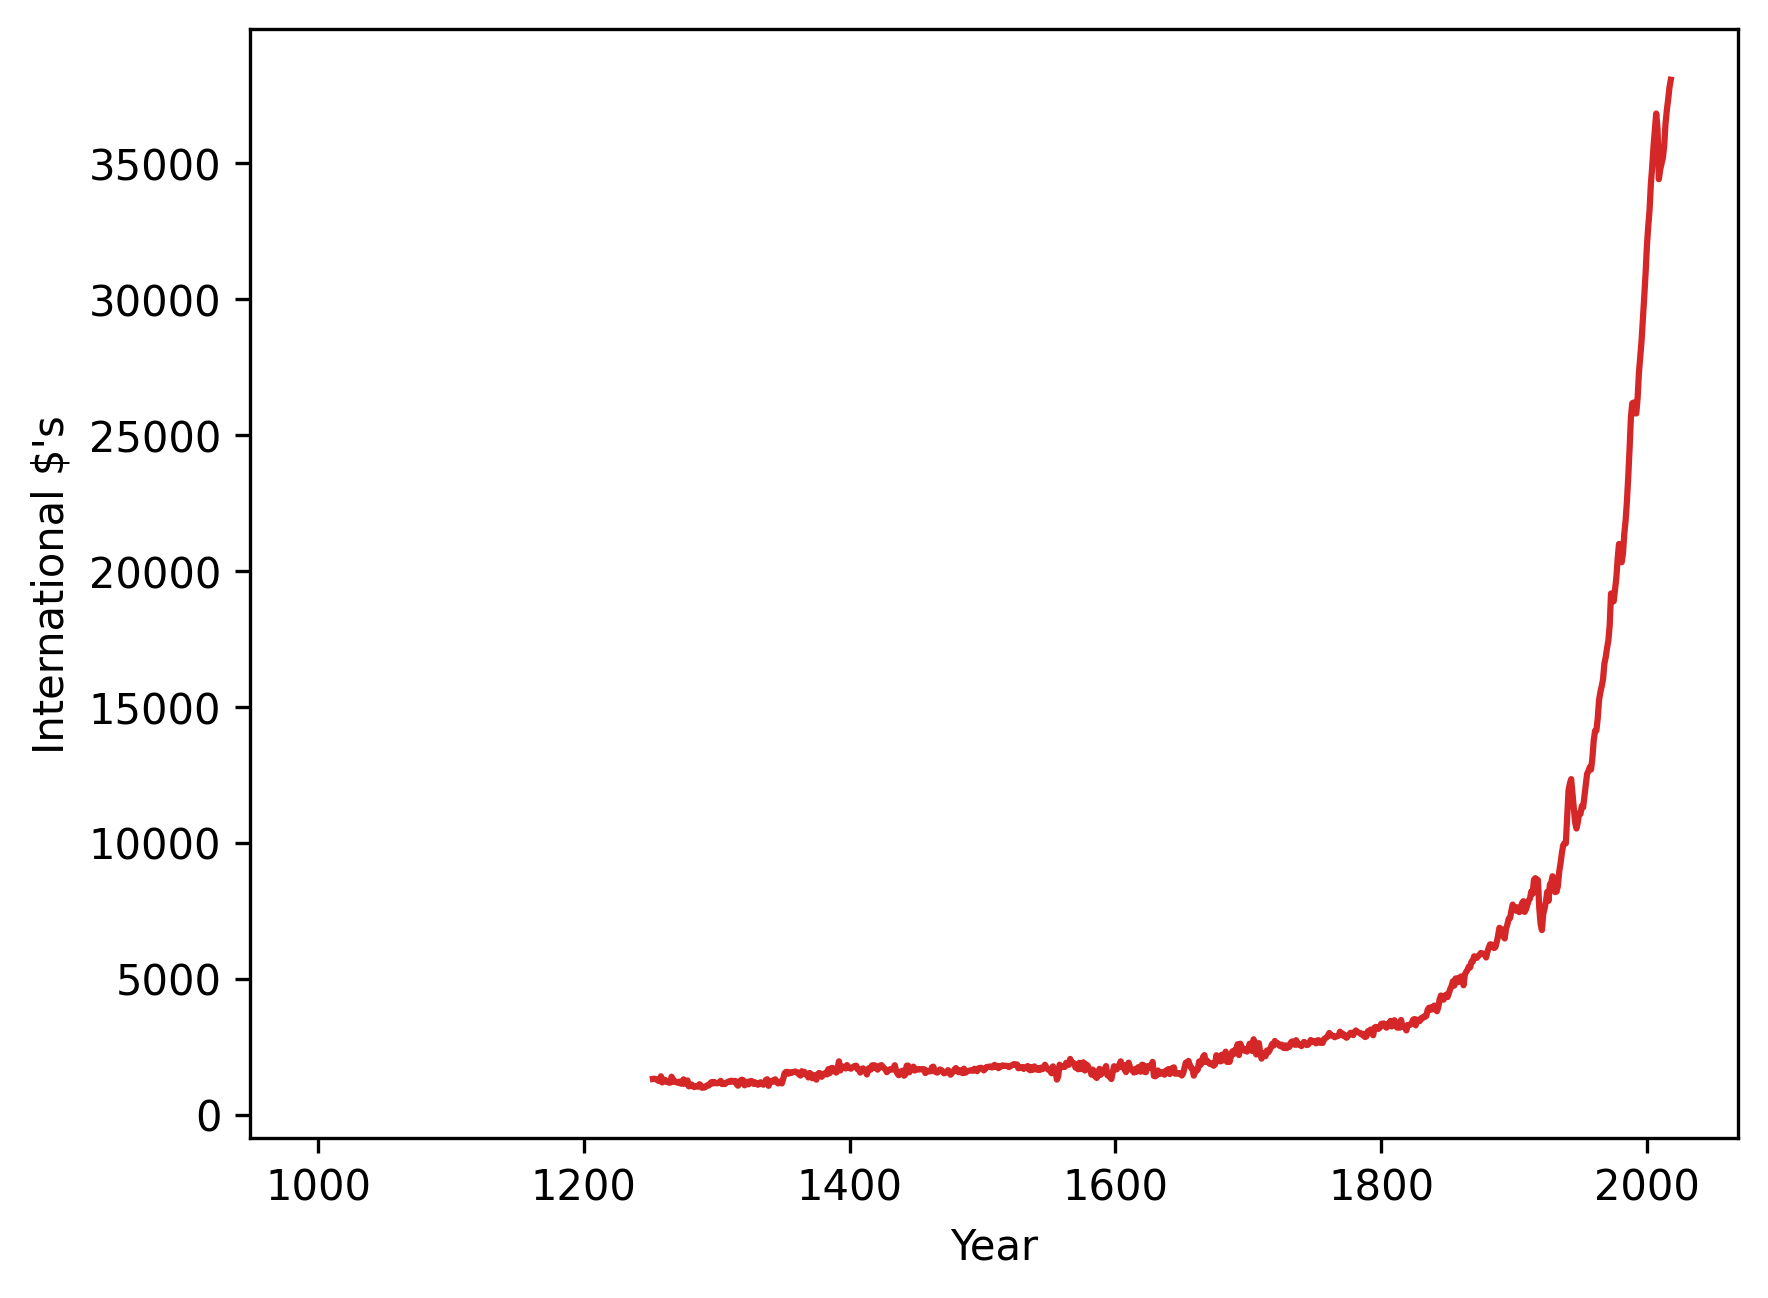

In [11]:
fig, ax = plt.subplots(dpi=300)
country = "GBR"
_ = gdppc[country].plot(
    ax = fig.gca(),
    ylabel = "International $\'s",
    xlabel = "Year",
    linestyle = "-",
    color=color_mapping["GBR"])

<center>Fig 3.1 - GDP Per Capita (GBR)</center>

**Note:** *International Dollars* are a hypotetical unit of currency that has the same PPP that the U.S. Dollar has in the United States at any given time.

Since the data is non-continuous for longer periods in the early 250 years of the millennium, it's possible to interpolate to get a continuous line plot. The dashed lines will indicate interpolated trends:

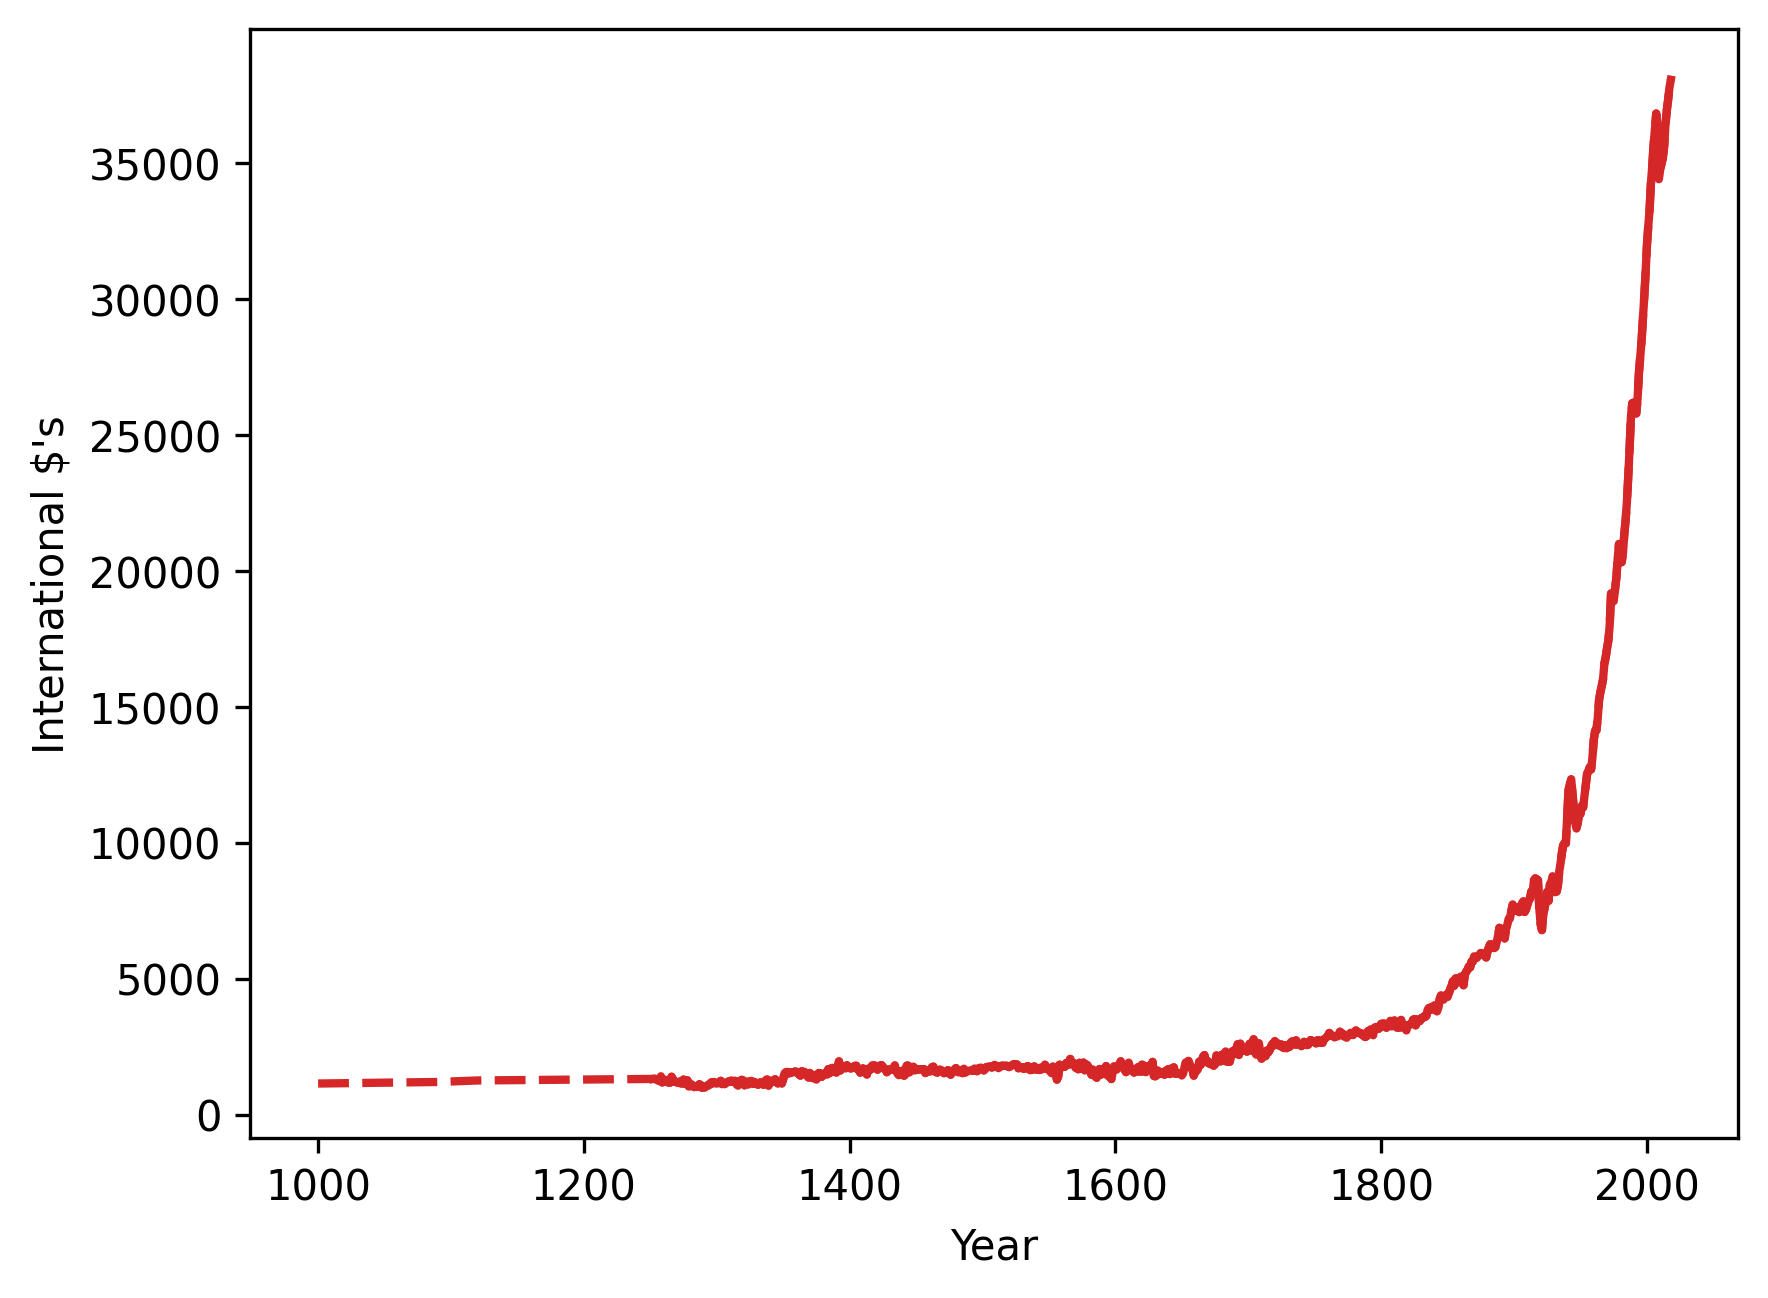

In [12]:
fig, ax = plt.subplots(dpi=300)
country = "GBR"

ax.plot(gdppc[country].interpolate(),
       linestyle="--",
       lw=2,
       color=color_mapping[country])

ax.plot(gdppc[country],
       linestyle="-",
       lw=2,
       color=color_mapping[country])

ax.set_ylabel("International $\'s")
ax.set_xlabel("Year")
plt.show()

<center>Fig 3.2 - GDP Per Capita (GBR)</center>

### 4) Function to generate plots

Now that the data has been transformed in a way that makes filtering easier, and there is a defined color mapping and style for graphics, it is possible to put it all into a function to generate plots for lists of countries.

In [13]:
def draw_interp_plots(series, ylabel, xlabel, color_mapping, code_to_name, lw, logscale, ax):
    for i, c in enumerate(countries):
        # Getting the interpolated data
        df_interpolated = series[c].interpolate(limit_area="inside")
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle="--",
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])
        
        # PLot the non-interpolated data with solid lines
        ax.plot(series[c],
                linestyle="-",
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]["country"])

        if logscale == True:
            ax.set_yscale("log")

    # Draw the legend outside the plot
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    return ax

### 5) Examples of Analysis

- According to the *Fig 1.2* the economic growth in Great Britain started in the 18th century and continued onwards. How would this compare to other countries growth trajectories?
- We can take a look at the United States (USA), United Kingdom (GBR), and China (CHN).
- A list of historical events has also been selected for each country:
    - China:
        - Closed-door Policy (1655 - 1684)
        - Reform and Opening-up (1978 - 1979)
    - United Kingdom:
        - The Navigation Act (1651)
        - The Repeal of Navigation Act (1849)
    - United States:
        - American Revolution (1765 - 1791)
    - World:
        - Industrial Revolution (1760 - 1840)
        - The Great Depression (1929 - 1939)

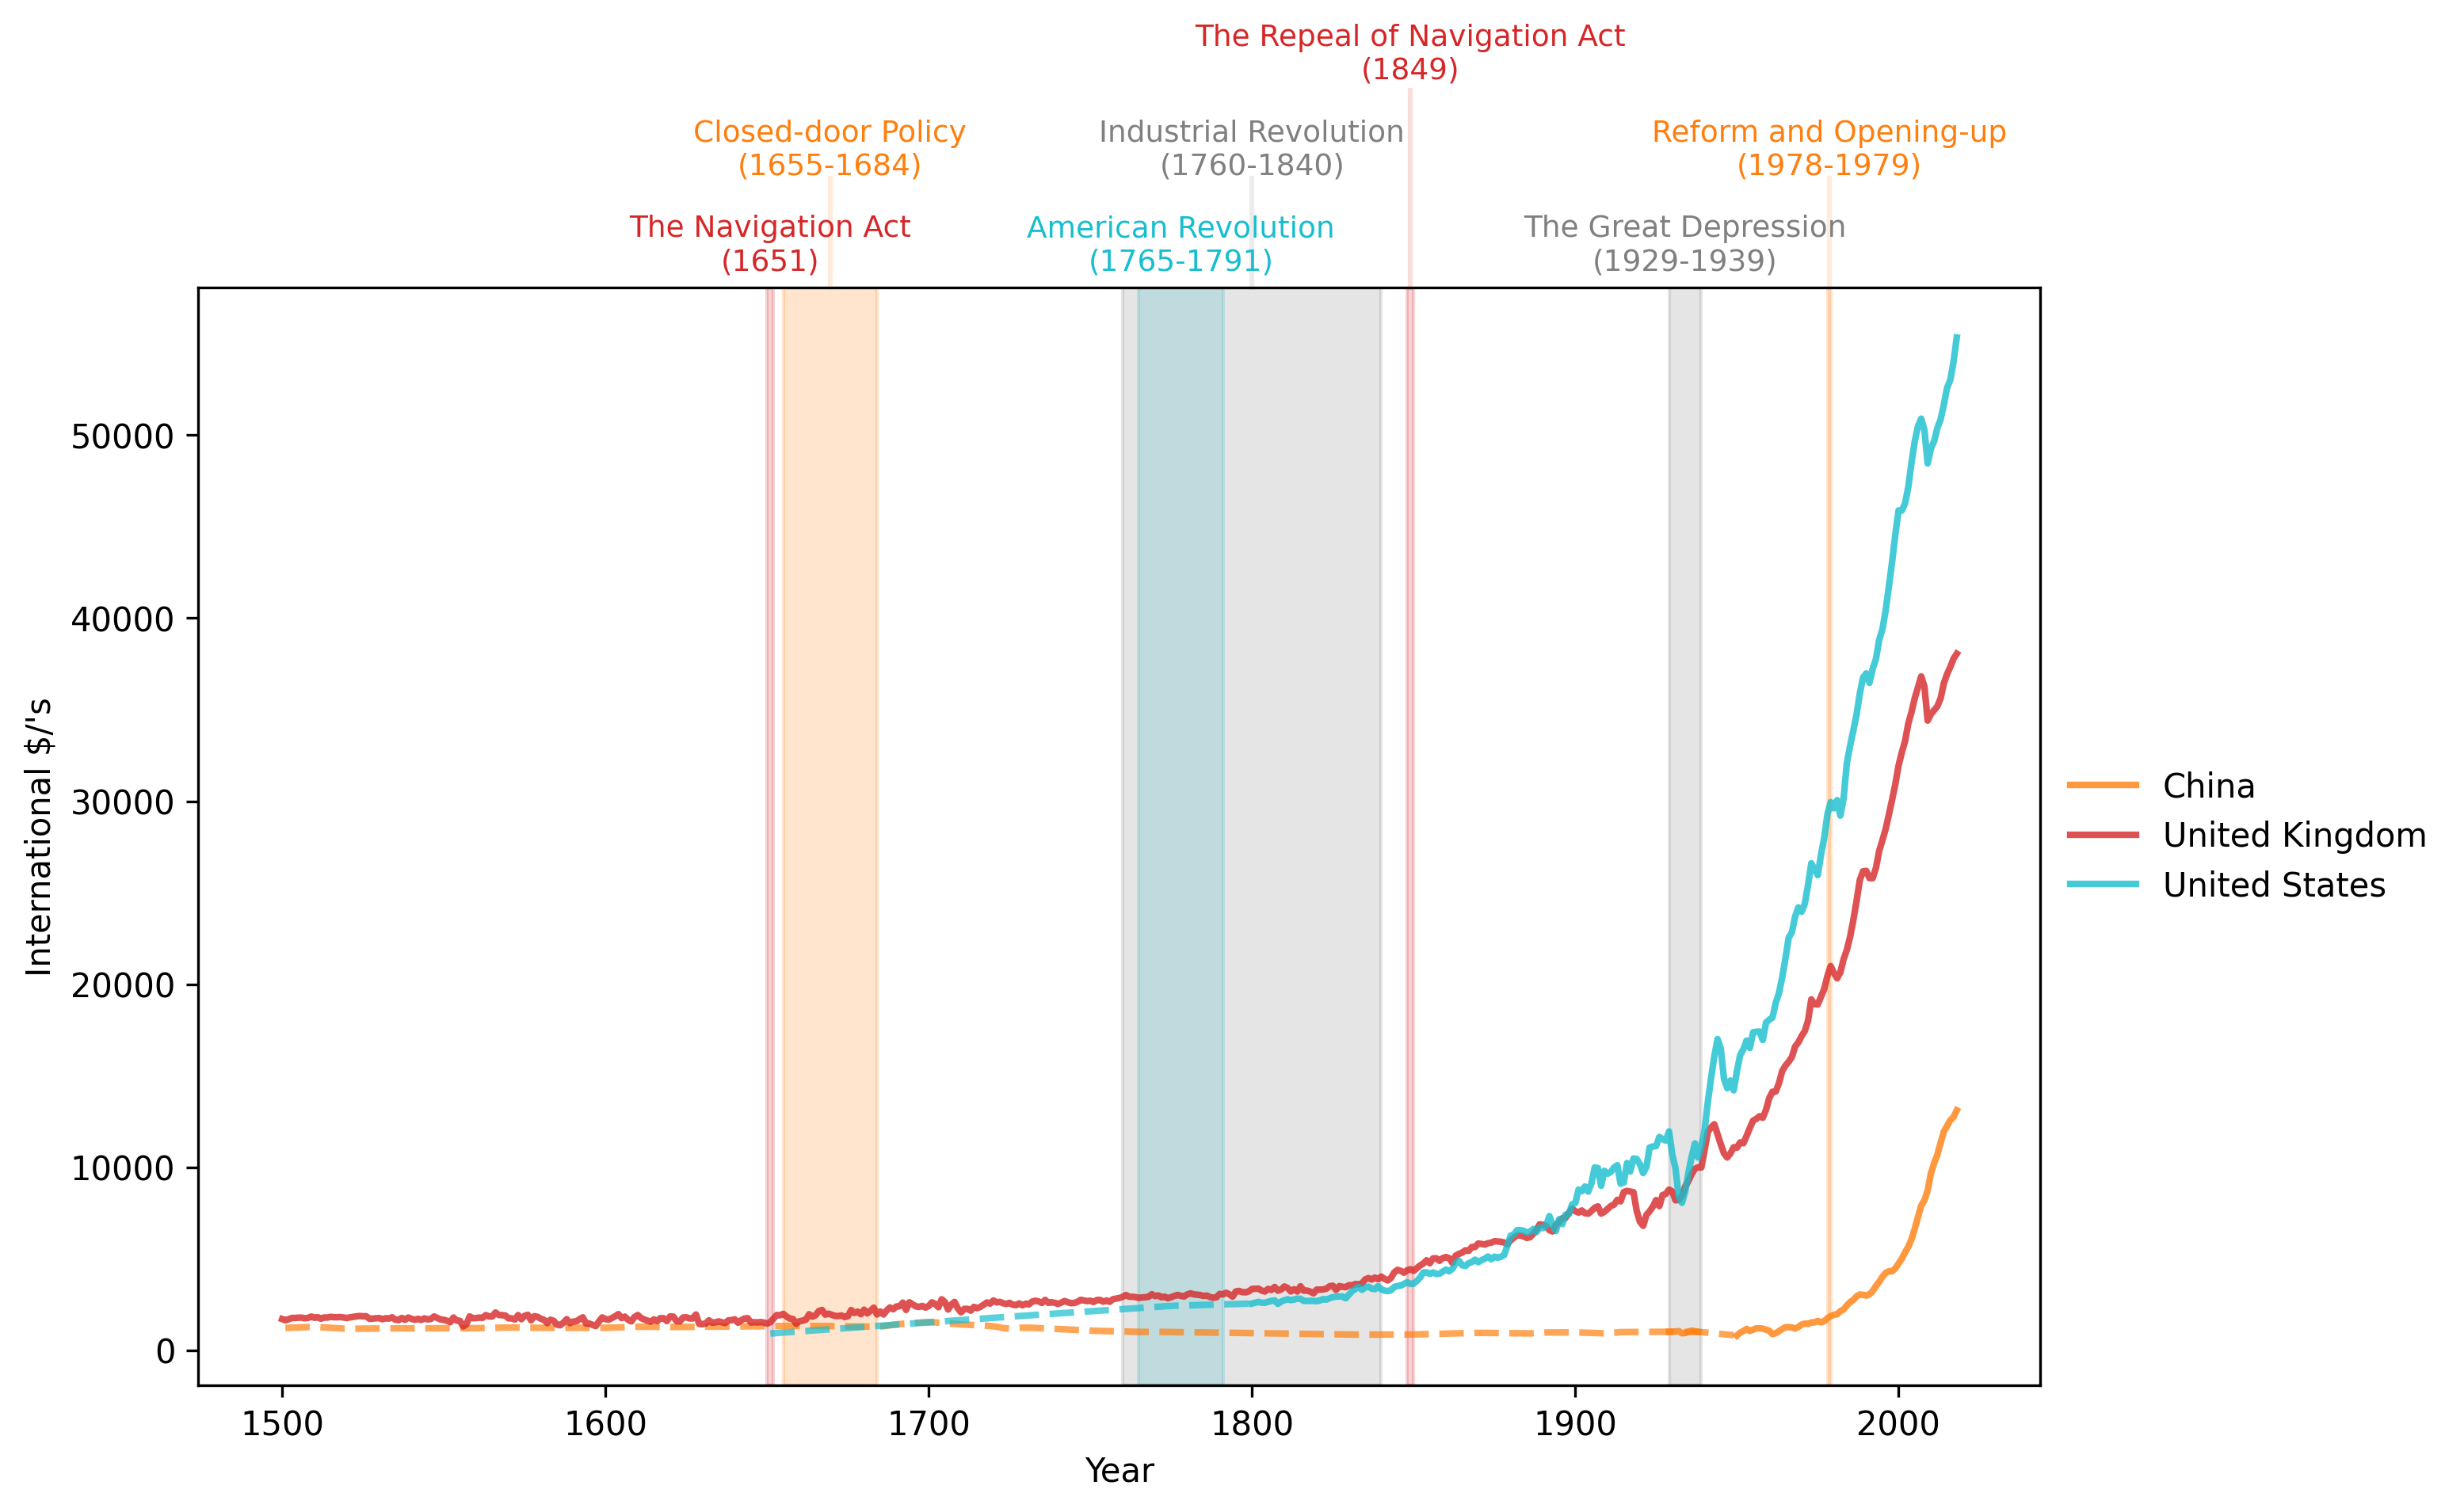

In [14]:
# Define a namedtuple for the events
Event = namedtuple("Event", ["year_range", "y_text", "text", "color", "ymax"])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ["CHN", "GBR", "USA"]
ax = draw_interp_plots(gdppc[countries].loc[1500:],
                       "International $/'s", "Year",
                       color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {"color": "grey", "alpha": 0.2}
t_params = {"fontsize": 9, "va":"center", "ha":"center"}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim * 0.04,
          "The Navigation Act\n(1651)",
          color_mapping["GBR"], 1),
    Event((1655, 1684), ylim + ylim*0.13,
          "Closed-door Policy\n(1655-1684)",
         color_mapping["CHN"], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          "The Repeal of Navigation Act\n(1849)",
          color_mapping["GBR"], 1.18),
    Event((1765, 1791), ylim + ylim*0.04,
          "American Revolution\n(1765-1791)",
          color_mapping["USA"], 1),
    Event((1760, 1840), ylim + ylim*0.13,
          "Industrial Revolution\n(1760-1840)",
          "grey", 1.1),
    Event((1929, 1939), ylim + ylim*0.04,
          "The Great Depression\n(1929-1939)",
          "grey", 1),
    Event((1978, 1979), ylim + ylim*0.13,
          "Reform and Opening-up\n(1978-1979)",
          color_mapping["CHN"], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid,
                event.y_text, event.text,
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1,
                   ymax=event.ymax, color=event.color,
                   linestyle="-", clip_on=False, alpha=0.15)

draw_events(events, ax)
plt.show()

<center>Fig 5.1 - GDP Per Capita, 1500 - (China, GBR, USA)</center>

**Analysis Observations**
- The Industrial Revolution has over time gradually lifted the living standards of substantial groups of people.
- Most of the growth happened in the past 150 years after the Industrial Revolution.
- Per Capita GDP in the US and UK rose and diverged from that of China from 1820 to 1940.
- The gap started to close after 1950 and increased its speed after the late 70's. 

#### 5.1 Observations of China's trajectory

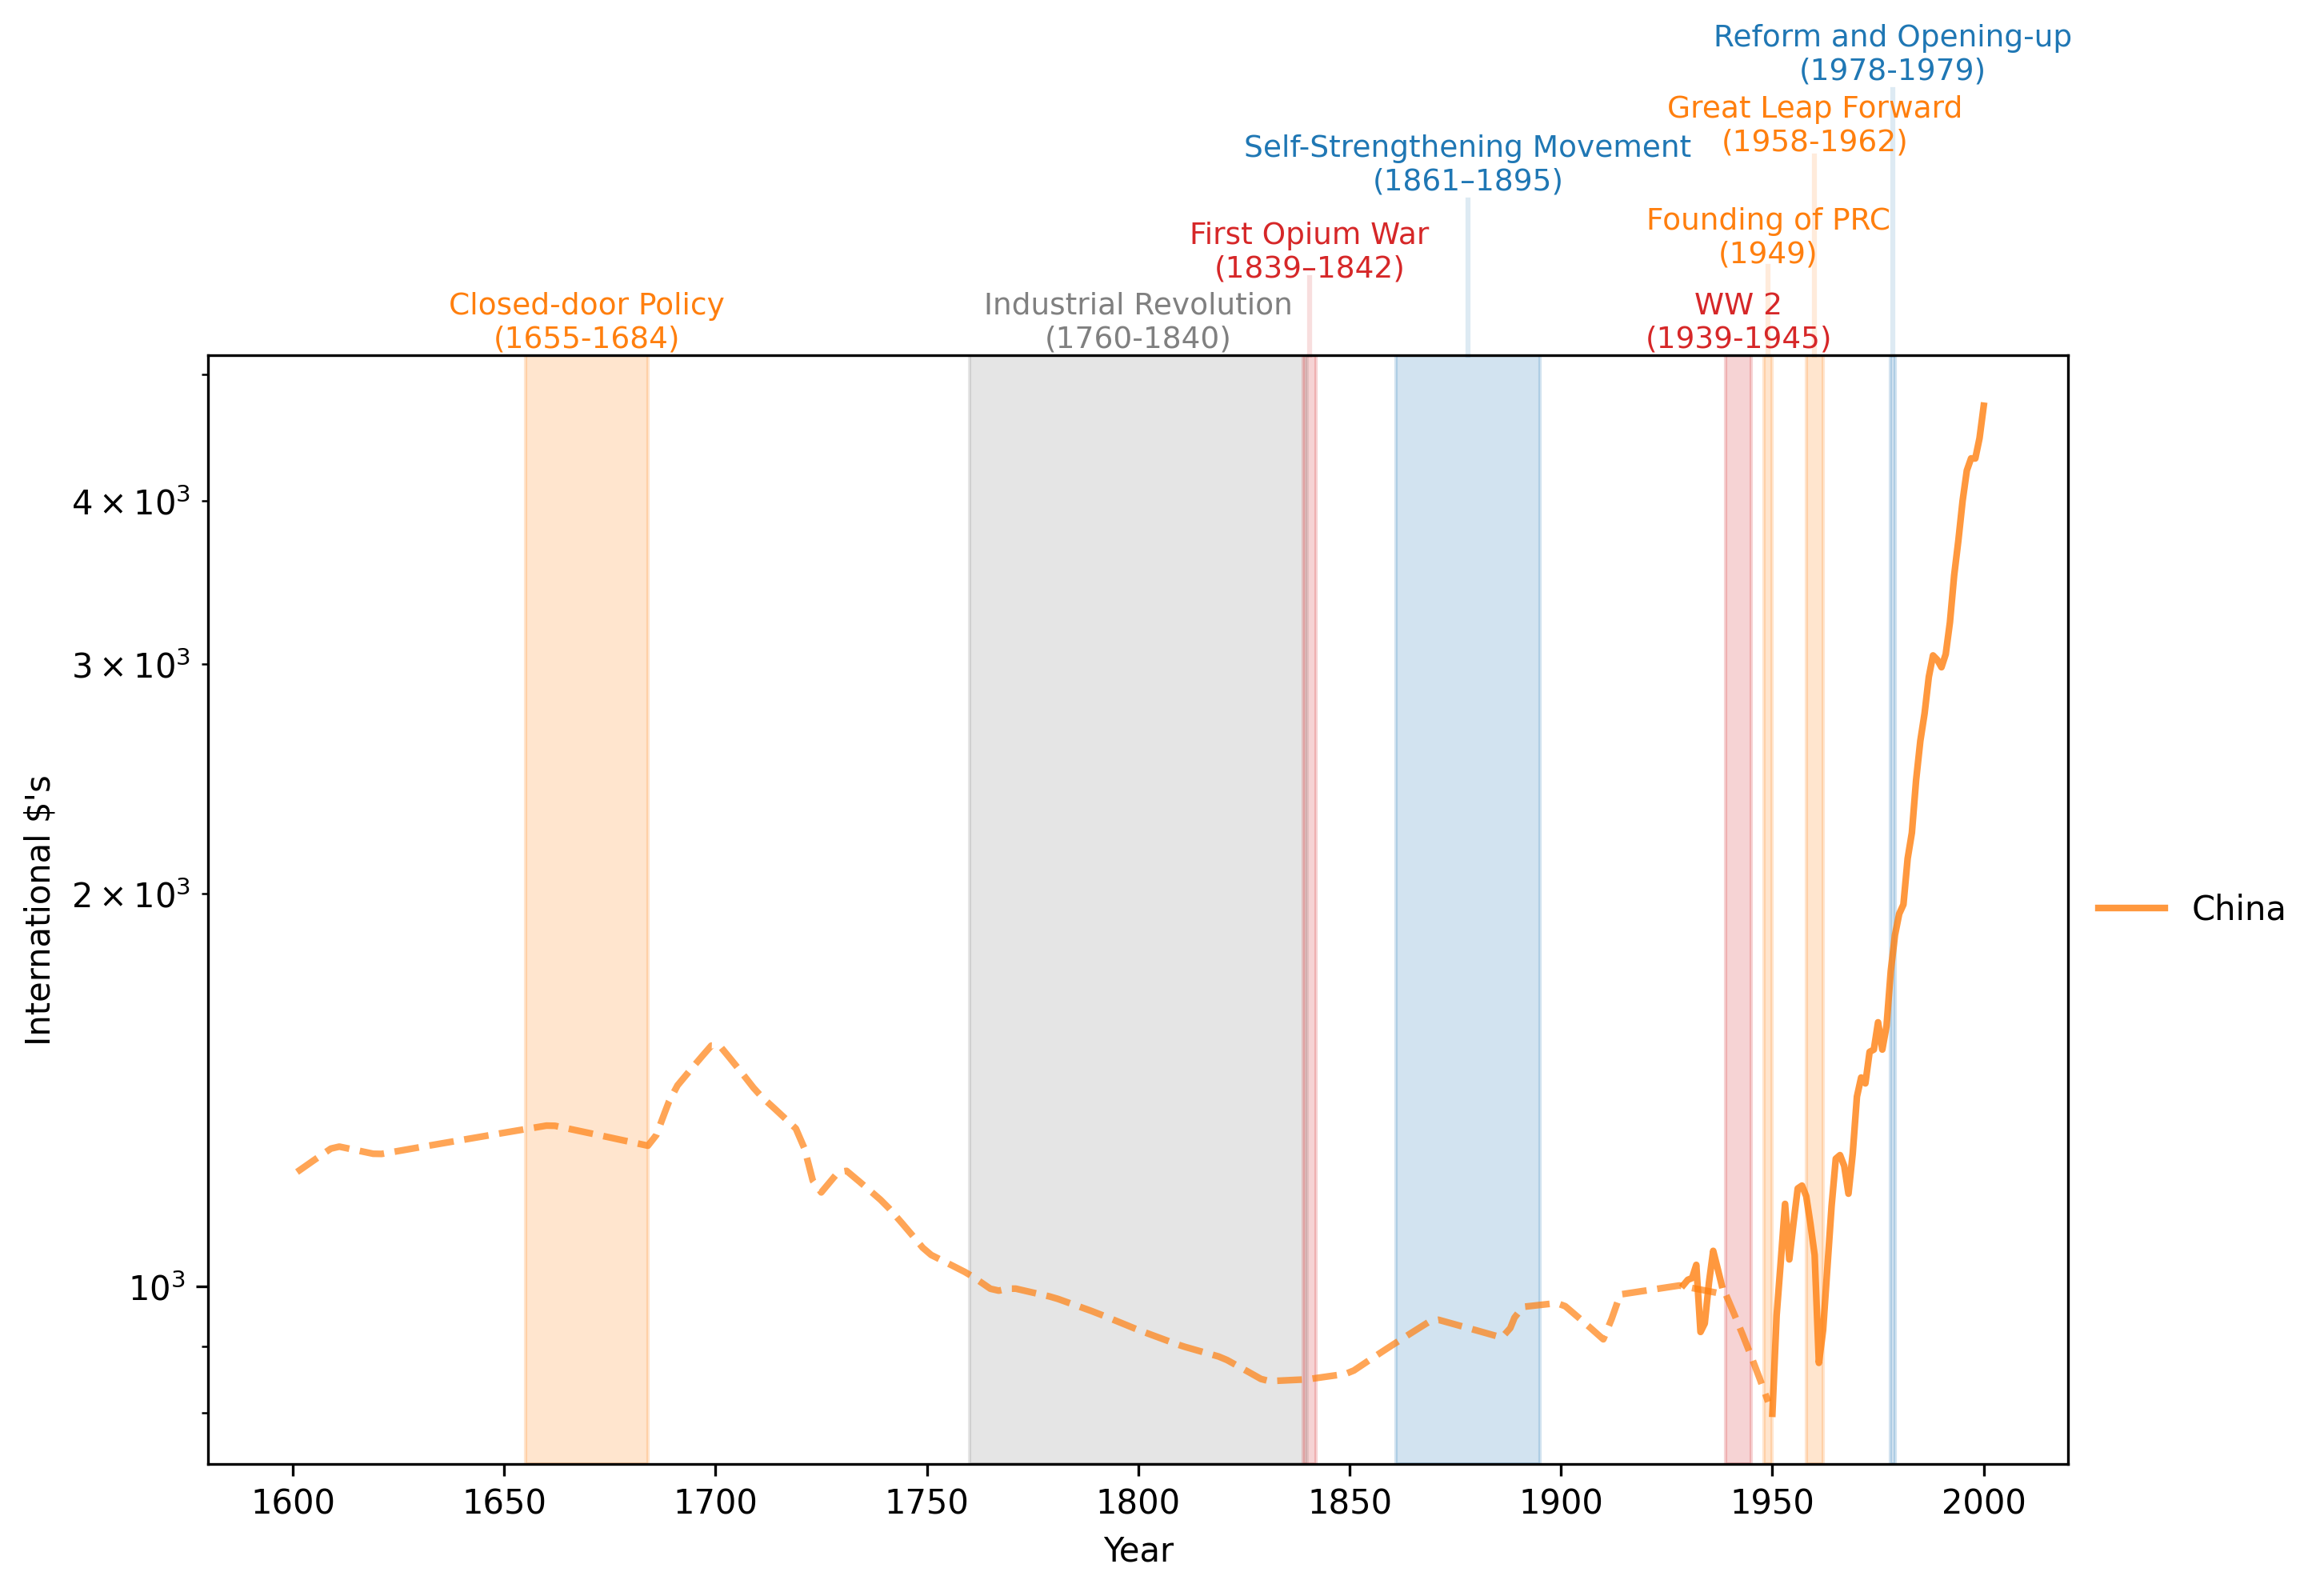

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ["CHN"]
ax = draw_interp_plots(gdppc[countries].loc[1600:2000],
                       'International $\'s', 'Year',
                       color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
    Event((1655, 1684), ylim + ylim*0.06,
        'Closed-door Policy\n(1655-1684)',
        'tab:orange', 1),
    Event((1760, 1840), ylim + ylim*0.06,
        'Industrial Revolution\n(1760-1840)',
        'grey', 1),
    Event((1839, 1842), ylim + ylim*0.2,
        'First Opium War\n(1839–1842)',
        'tab:red', 1.07),
    Event((1861, 1895), ylim + ylim*0.4, 
        'Self-Strengthening Movement\n(1861–1895)', 
        'tab:blue', 1.14),
    Event((1939, 1945), ylim + ylim*0.06, 
        'WW 2\n(1939-1945)', 
        'tab:red', 1),
    Event((1948, 1950), ylim + ylim*0.23, 
        'Founding of PRC\n(1949)', 
        color_mapping['CHN'], 1.08),
    Event((1958, 1962), ylim + ylim*0.5, 
        'Great Leap Forward\n(1958-1962)', 
        'tab:orange', 1.18),
    Event((1978, 1979), ylim + ylim*0.7, 
        'Reform and Opening-up\n(1978-1979)', 
        'tab:blue', 1.24)
]

draw_events(events, ax)
plt.show()

<center>Fig 5.2 - GDP Per Capita, 1600 - 2000 (China)</center>

**China's Analysis Observations**
- The Closed-door Policy by the Qing Government was followed by a long economic downturn and stagnation.
- The Self-Strengthening Movement seemed to help China grow.
- The growth achievements of modern Chinese economic policies are remarkable.

#### 5.2 Observations of US's and UK's trajectory

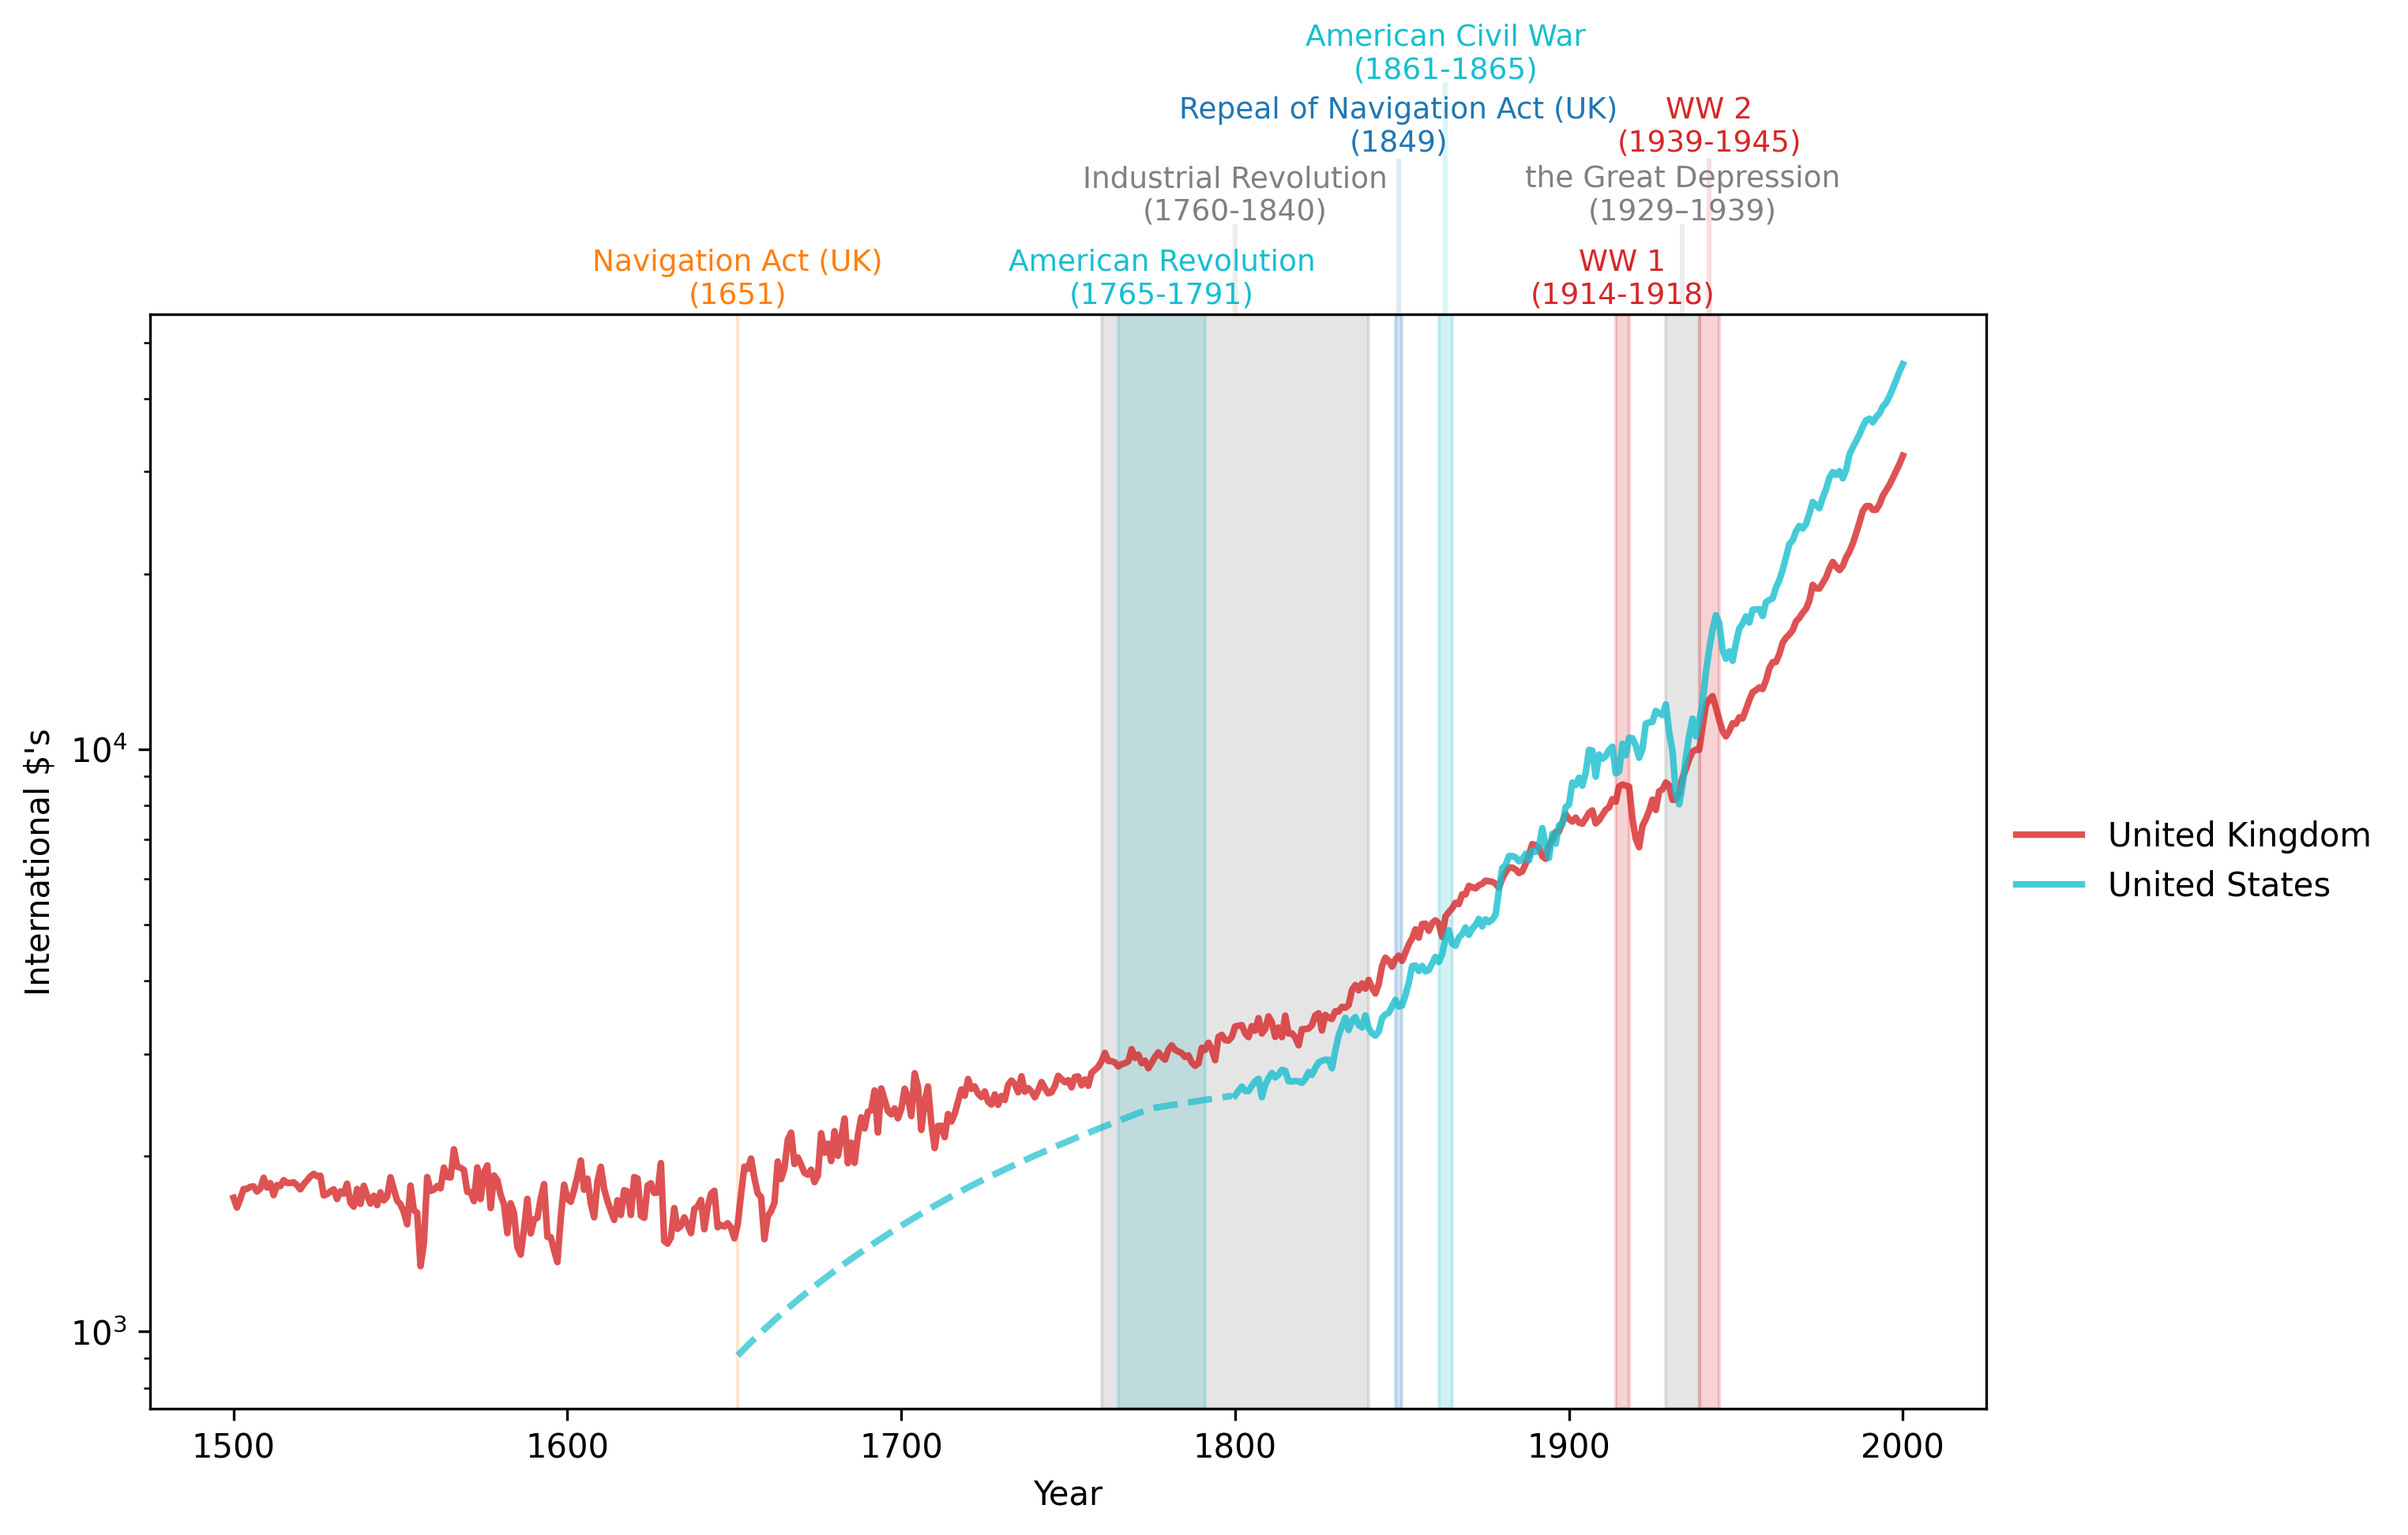

In [21]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ['GBR', 'USA']
ax = draw_interp_plots(gdppc[countries].loc[1500:2000],
                      "International $\'s", "Year",
                      color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

draw_events(events, ax)
plt.show()

<center>Fig 5.3 - GDP Per Capita, 1500 - 2000 (UK & US)</center>

**US's & UK's Analysis Observations**
- Trade Policy stated by the Navigation Act had an impact on the Economy. This acts were based on the economical ideas of "mercantilism" and had the intention to restrict trade outside of the empire.
- Industrial Revolution accelerated an increase in productivity and wealth.
- Wars can have different impacts on the economy. Often unanticipated.
- Despite the recessions and depressions of the Business Cycle, the economy tends to grow in the long run.

#### 5.3 The Industrialized World

The authors proposed constructing graphs of interest for geopolitical historians like Adam Tooze.

Therefore, we will be focusing on total GDP as a proxy for "national geopolitical-military power, rather than GDP per capita (as a proxy for living standards)

In [29]:
data = pd.read_excel("./datasets/mpd2020.xlsx", sheet_name="Full data")
data.set_index(["countrycode", "year"], inplace=True)
data["gdp"] = data["gdppc"] * data["pop"]
gdp = data["gdp"].unstack("countrycode")

##### 5.3.1 Early industrialization (1820 to 1940)

Countries of analysis: China, the USSR, Japan, UK, and the US.

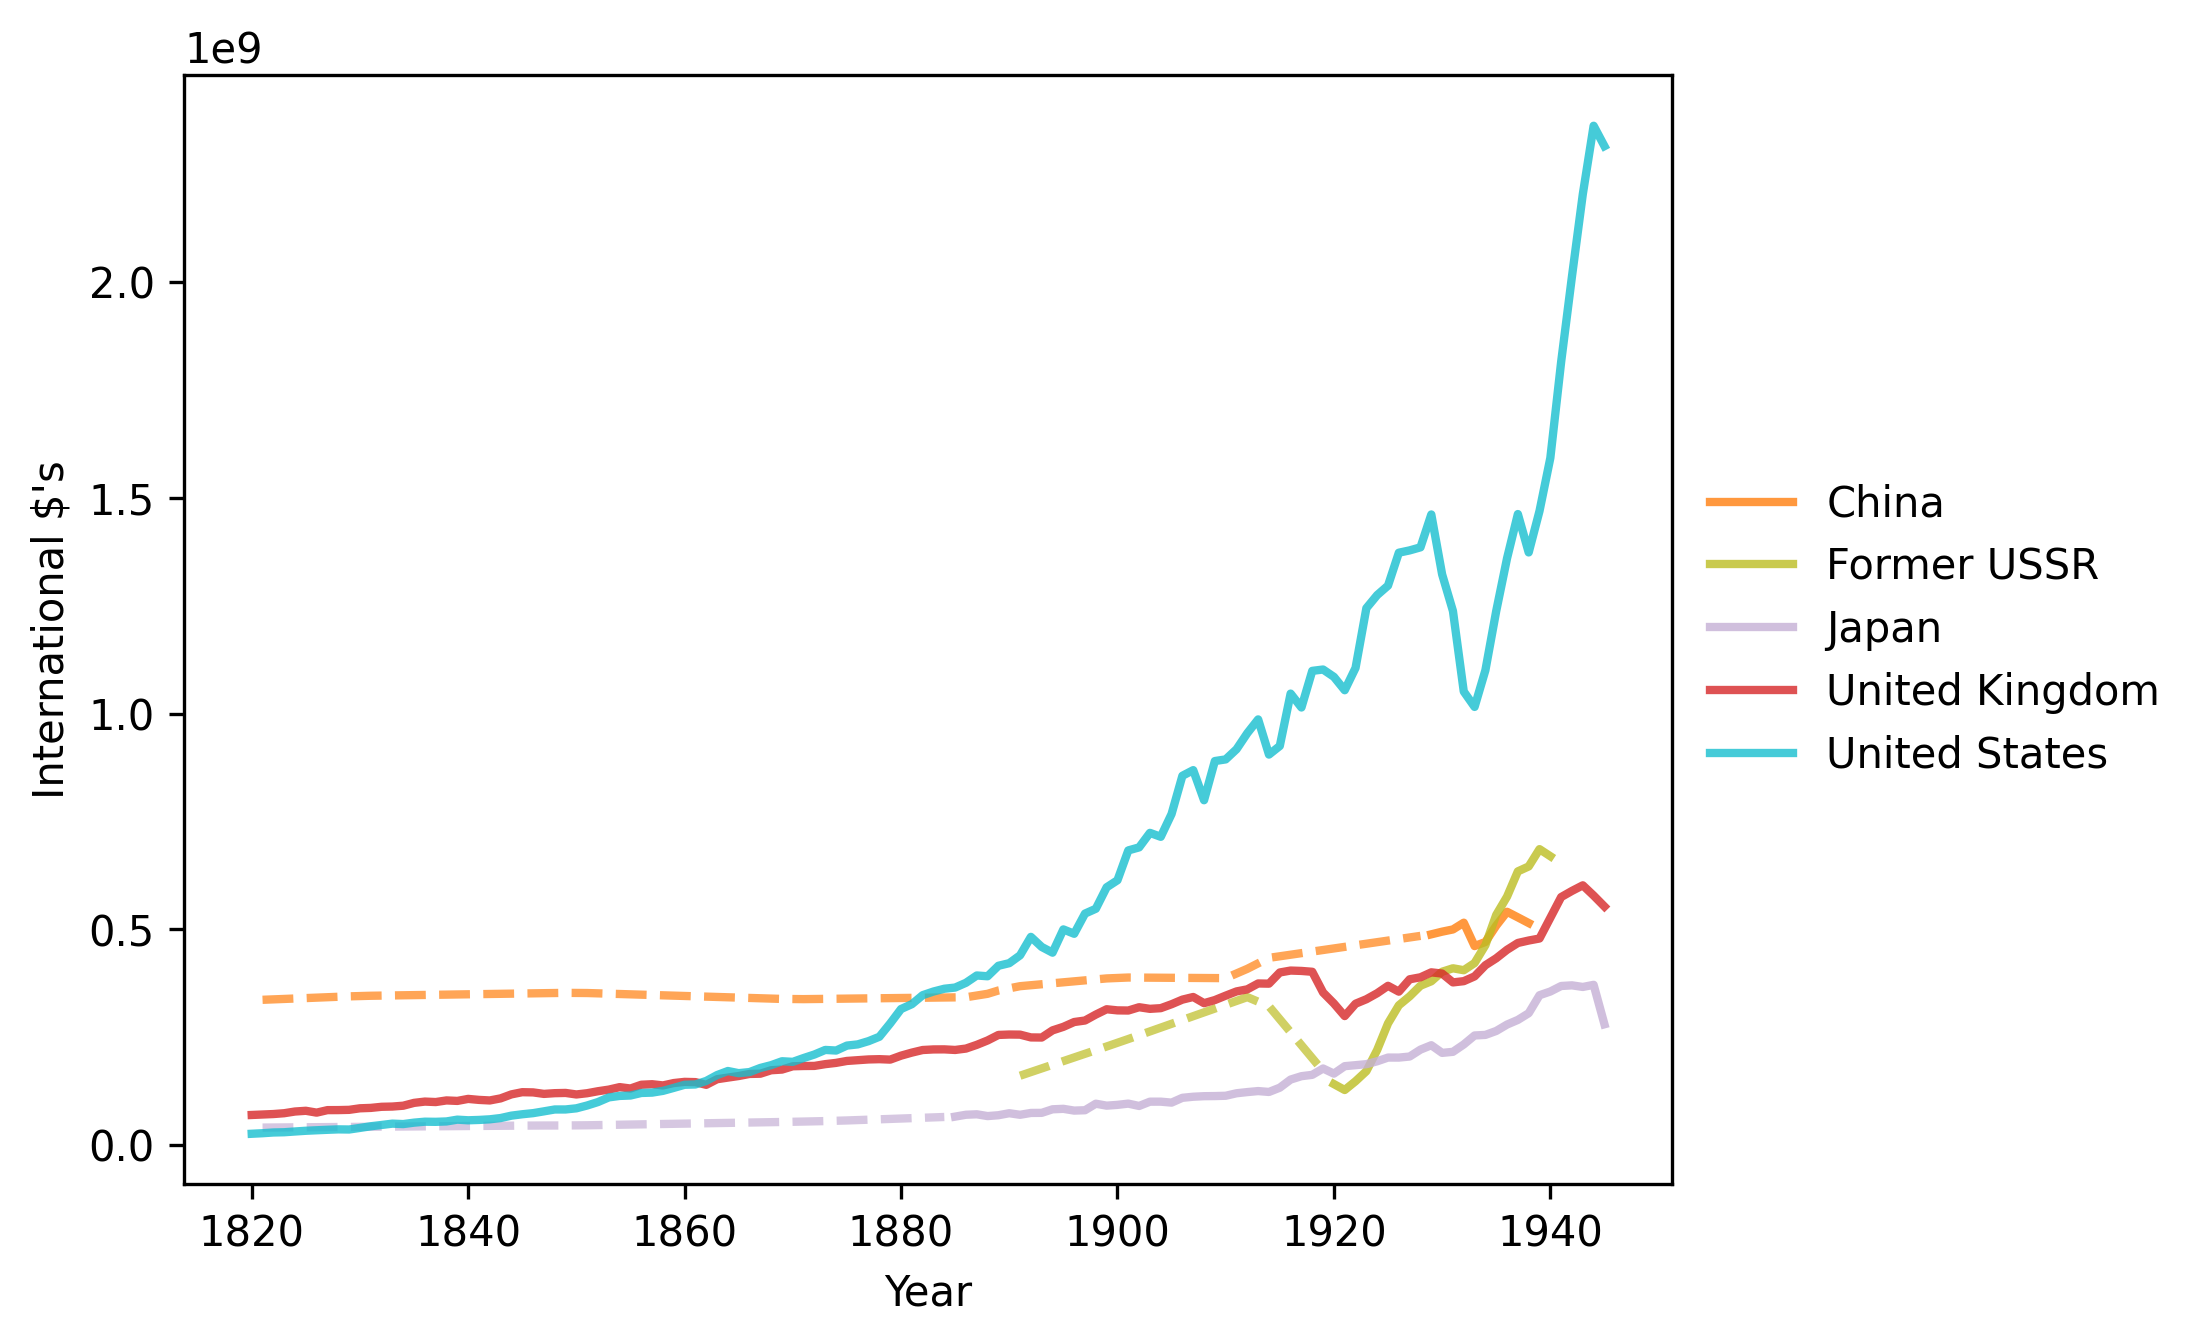

In [30]:
fig, ax = plt.subplots(dpi=300)
ax = fig.gca()
countries = ["CHN", "SUN", "JPN", "GBR", "USA"]
start_year, end_year = (1820, 1945)
ax = draw_interp_plots(gdp[countries].loc[start_year:end_year],
                      "International $\'s", "Year",
                      color_mapping, code_to_name, 2, False, ax)

<center>Fig 5.4 - GDP at the Early Industrialization Period 1820 - 1940</center>

- The US surpassed the UK in the 1860's and China in the 1880's. It's growth has been signicantly remarkable.
- When the Great Depression hit the US growth experienced a deep contraction in the 1930's.
- Russia experienced significant setbacks during WW1 which led to the February Revolution and foundation of the USSR after this it recovered.

##### 5.3.2 Constructing a plot like Tooze's

The authors proposed constructing a version of the figure in chapter 1 of `Adam Tooze. The deluge: the great war, america and the remaking of the global order, 1916–1931. 2014.`

First, we will define a collection of countries from the British Empire (BEM)

<Axes: xlabel='year'>

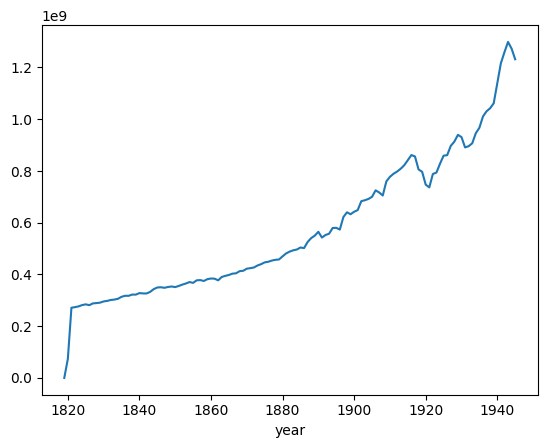

In [35]:
BEM = ["GBR", "IND", "AUS", "NZL", "CAN", "ZAF"]
gdp["BEM"] = gdp[BEM].loc[start_year-1:end_year].interpolate(method="index").sum(axis=1)
gdp["BEM"].plot() #The first year is np.nan due to interpolation

Assembling series and getting ready to plot

In [42]:
color_mapping["BEM"] = color_mapping["GBR"]

#Adding British Empire to code_to_name
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=["country"])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

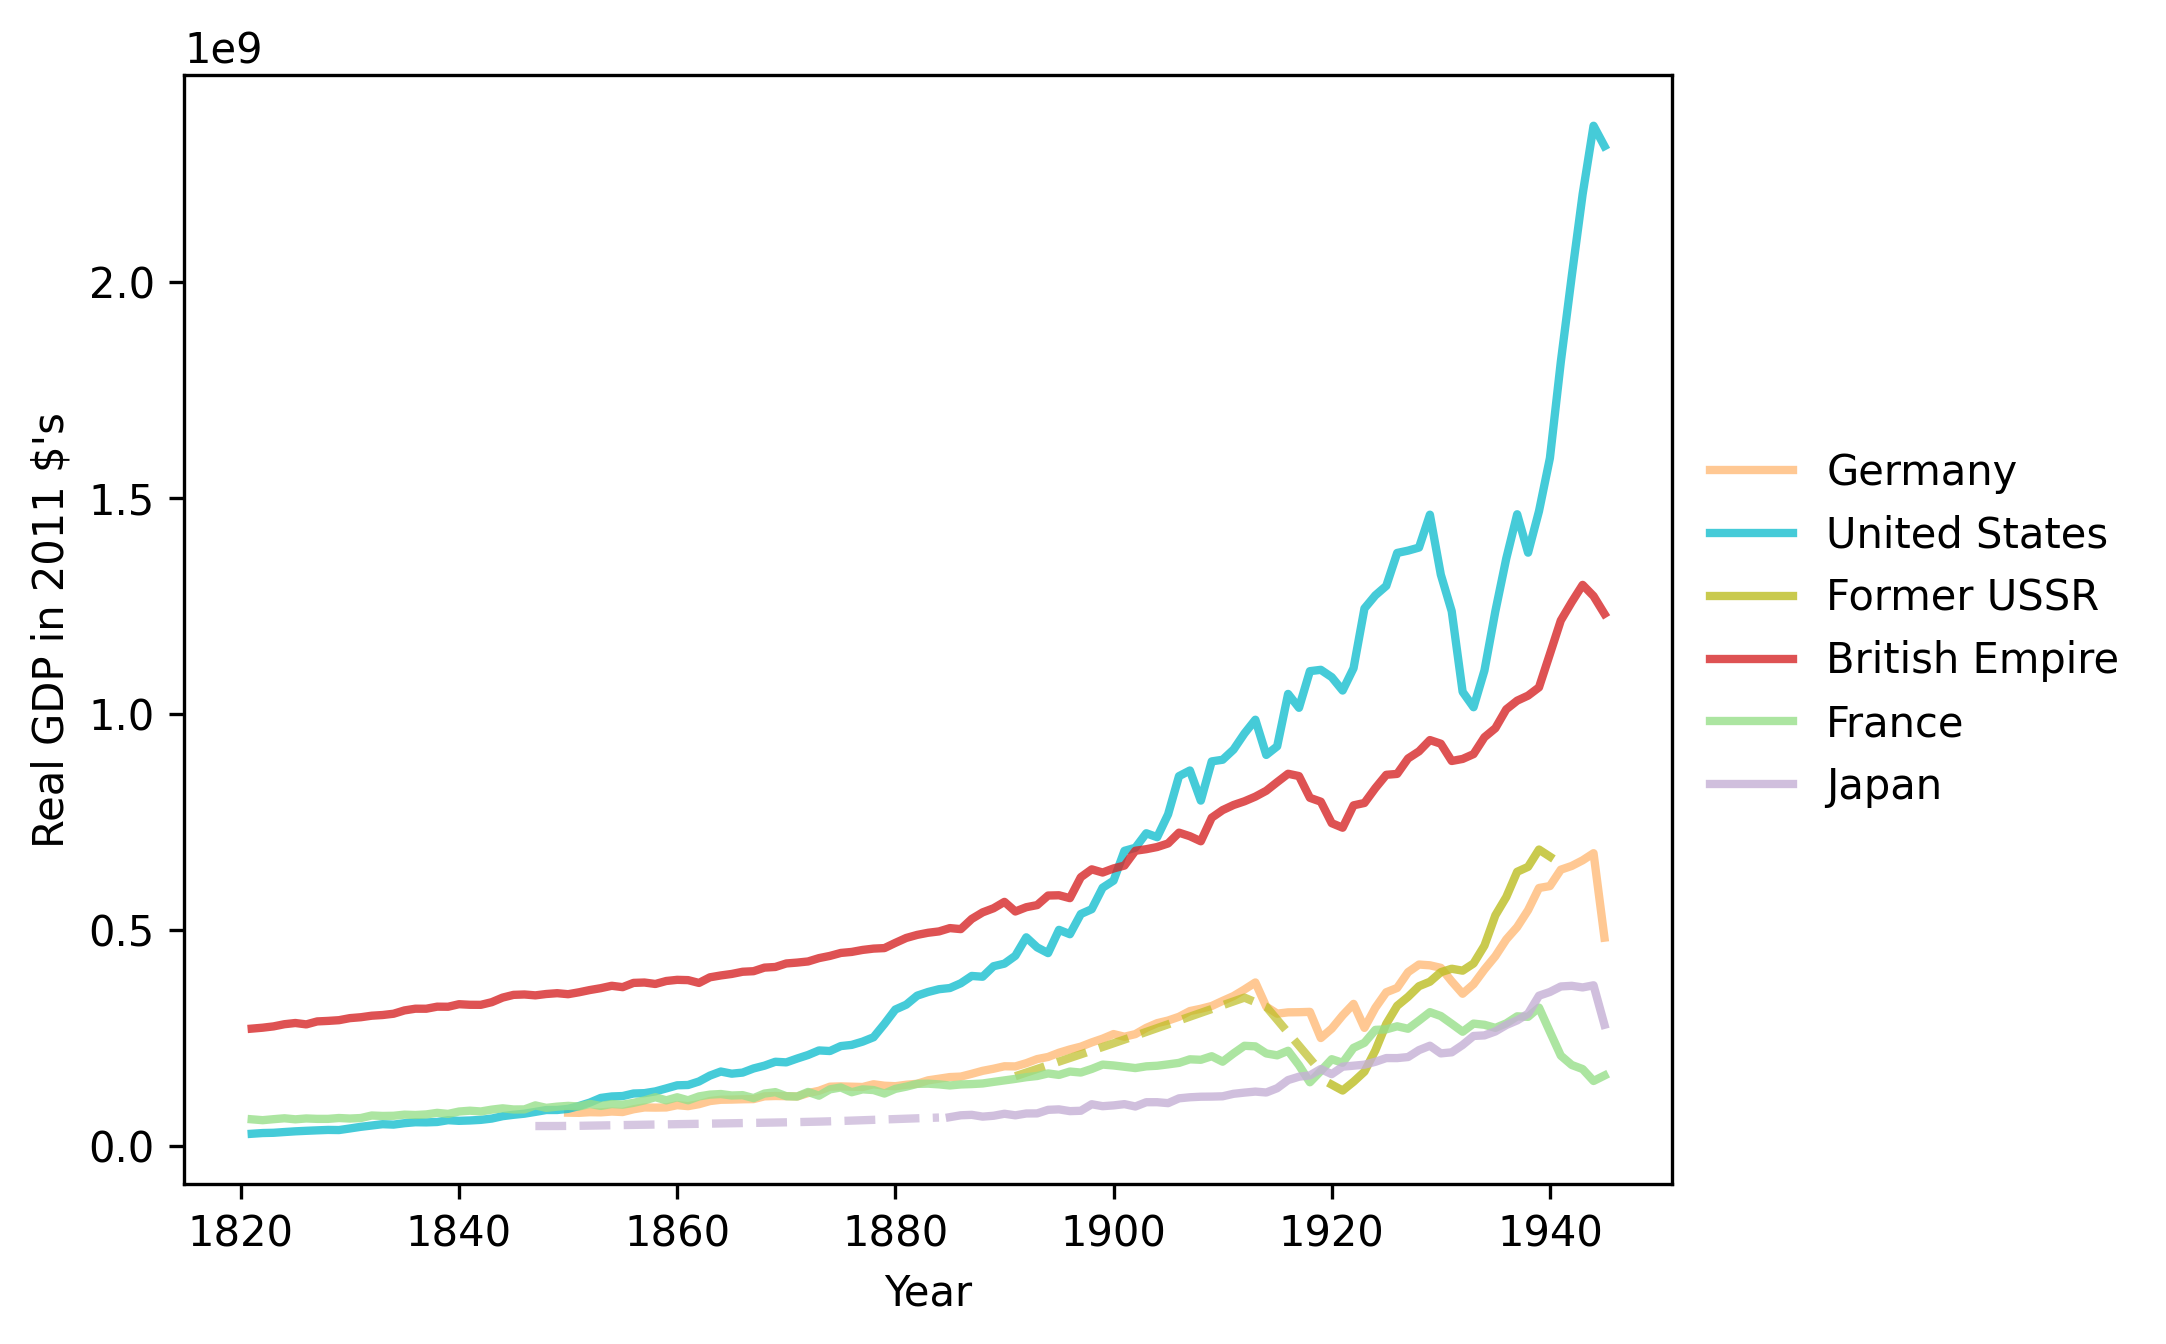

In [43]:
fig, ax = plt.subplots(dpi=300)
ax = fig.gca()
countries = ["DEU", "USA", "SUN", "BEM", "FRA", "JPN"]
start_year, end_year = (1821, 1945)
ax = draw_interp_plots(gdp[countries].loc[start_year:end_year],
                      "Real GDP in 2011 $\'s", "Year", color_mapping,
                      code_to_name, 2, False, ax)
plt.savefig("./graphs/tooze_ch1_grph.png", dpi=300, bbox_inches="tight")
plt.show()

<center>Fig 5.5 -  figure in chapter 1 of Adam Tooze. The deluge: the great war, america and the remaking of the global order, 1916–1931. 2014.</center>

The graph shows the evolution of the US' GDP since the start of the 19th century and how it overtook the one of the British Empire by the end of it, setting the geopolitical stage for the "American Century".

##### 5.3.3 The modern era (1950 to 2020)